# Project 3: Customer Segmentation

## Problem Statement: Cluster customers into distinct groups based on their demographics, behaviors, or purchase patterns.
### Student Name:- SUMAN RAKSHIT 
### CSI ID:- CT-CSI23/DS0605

#### Objectives of this project

- Understand the importance of Customer Segmentation for a Business.
- In this project we are going to explore the various Clustering Methods which is a part of Unsupervised Machine Learning.
- Determining the best Clustering Method for the specific Dataset.
- conclude by finding the optimal Solution for the Problem Statement.

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df=pd.read_csv('customers.csv')
df

,Name,email,phone_no,address,gender,age,no-of-orders,spent_in_week,job,website,annual_income
0,Joseph Rice,josephrice131@slingacademy.com,8568697744,"91773 Miller Shoal\nDiaztown, FL 38841",male,29,8.0,415.33,Accountant,goPuff,61703.0
1,Gary Moore,garymoore386@slingacademy.com,8894334342,"6450 John Lodge\nTerriton, KY 95945",male,31,9.0,453.49,Accountant,UberEats,63788.0
2,John Walker,johnwalker944@slingacademy.com,9546779749,"27265 Murray Island\nKevinfort, PA 63231",male,18,9.0,462.80,Accountant,Grubhub,63306.0
3,Eric Carter,ericcarter176@slingacademy.com,8646218619,USNS Knight\nFPO AA 76532,male,38,11.0,544.54,Accountant,Grubhub,66894.0
4,William Jackson,williamjackson427@slingacademy.com,6894694791,"170 Jackson Loaf\nKristenland, AS 48876",male,58,11.0,545.53,Accountant,Grubhub,67950.0
...,...,...,...,...,...,...,...,...,...,...,...
294,Kyle Bright,kylebright610@slingacademy.com,7686534273,79812 Michael Forest Apt. 975\nPort Ambermouth...,male,28,NaN,NaN,Unemployed,goPuff,NaN
295,Kevin Santiago,kevinsantiago366@slingacademy.com,8789214691,"47537 Brian Hill\nPort Jenniferborough, FL 59315",male,41,NaN,NaN,Unemployed,UberEats,NaN
296,Timothy Gutierrez,timothygutierrez760@slingacademy.com,8836088951,"81870 Kemp Tunnel\nSalinasberg, MI 70073",male,68,NaN,NaN,Unemployed,UberEats,NaN
297,Ivan Callahan,ivancallahan817@slingacademy.com,6498702366,"86844 Amanda Parkways\nNew Michaelside, OR 69657",male,72,NaN,NaN,Unemployed,goPuff,NaN


In [3]:
# Returns sum of the null values in a column
df.isnull().sum()

Name              0
email             0
phone_no          0
address           0
gender            0
age               0
no-of-orders     10
spent_in_week    10
job               0
website           0
annual_income    10
dtype: int64

# Data Cleaning

In [4]:
# Creating the copy of dataset
df_copy = df.copy(deep=True)
# Droping the rows which have null values 
df = df.dropna(axis=0)
df

,Name,email,phone_no,address,gender,age,no-of-orders,spent_in_week,job,website,annual_income
0,Joseph Rice,josephrice131@slingacademy.com,8568697744,"91773 Miller Shoal\nDiaztown, FL 38841",male,29,8.0,415.33,Accountant,goPuff,61703.0
1,Gary Moore,garymoore386@slingacademy.com,8894334342,"6450 John Lodge\nTerriton, KY 95945",male,31,9.0,453.49,Accountant,UberEats,63788.0
2,John Walker,johnwalker944@slingacademy.com,9546779749,"27265 Murray Island\nKevinfort, PA 63231",male,18,9.0,462.80,Accountant,Grubhub,63306.0
3,Eric Carter,ericcarter176@slingacademy.com,8646218619,USNS Knight\nFPO AA 76532,male,38,11.0,544.54,Accountant,Grubhub,66894.0
4,William Jackson,williamjackson427@slingacademy.com,6894694791,"170 Jackson Loaf\nKristenland, AS 48876",male,58,11.0,545.53,Accountant,Grubhub,67950.0
...,...,...,...,...,...,...,...,...,...,...,...
284,Janet Rivera,janetrivera296@slingacademy.com,6242133774,"9443 Gilbert Circles\nWest Williamchester, AL ...",female,27,1.0,62.52,Waitress,UberEats,25302.0
285,James Robbins,jamesrobbins145@slingacademy.com,7568379012,"4793 Travis Course\nAmberview, KS 58774",male,28,1.0,69.28,Waitress,goPuff,21812.0
286,Grace Cooper,gracecooper620@slingacademy.com,7959045545,Unit 5810 Box 7469\nDPO AE 27539,female,36,2.0,99.95,Waitress,Grubhub,24555.0
287,Denise Cook,denisecook866@slingacademy.com,6205089412,"143 Danielle Route\nNew Seanburgh, FM 77823",female,35,2.0,106.23,Waitress,ChowNow,19100.0


In [5]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,Name,email,phone_no,address,gender,age,no-of-orders,spent_in_week,job,website,annual_income
0,Joseph Rice,josephrice131@slingacademy.com,8568697744,"91773 Miller Shoal\nDiaztown, FL 38841",male,29,8.0,415.33,Accountant,goPuff,61703.0
1,Gary Moore,garymoore386@slingacademy.com,8894334342,"6450 John Lodge\nTerriton, KY 95945",male,31,9.0,453.49,Accountant,UberEats,63788.0
2,John Walker,johnwalker944@slingacademy.com,9546779749,"27265 Murray Island\nKevinfort, PA 63231",male,18,9.0,462.80,Accountant,Grubhub,63306.0
3,Eric Carter,ericcarter176@slingacademy.com,8646218619,USNS Knight\nFPO AA 76532,male,38,11.0,544.54,Accountant,Grubhub,66894.0
4,William Jackson,williamjackson427@slingacademy.com,6894694791,"170 Jackson Loaf\nKristenland, AS 48876",male,58,11.0,545.53,Accountant,Grubhub,67950.0


In [6]:
# Returns basic statistics on numeric columns
df.describe()

,phone_no,age,no-of-orders,spent_in_week,annual_income
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000
mean,8.027975e+09,34.747405,10.034602,516.018789,77158.730104
std,1.118604e+09,7.815707,5.937070,292.074674,47155.392878
min,6.022790e+09,18.000000,0.000000,16.530000,10711.000000
25%,7.028959e+09,28.000000,5.000000,255.440000,45879.000000
50%,8.030707e+09,33.000000,10.000000,528.320000,63788.000000
75%,8.967715e+09,41.000000,15.000000,763.270000,94790.000000
max,9.963204e+09,59.000000,20.000000,997.480000,279302.000000


In [7]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Name              object
email             object
phone_no           int64
address           object
gender            object
age                int64
no-of-orders     float64
spent_in_week    float64
job               object
website           object
annual_income    float64
dtype: object

In [8]:
#changing the data type of the columns below from Float to Integer
df['no-of-orders'] = df['no-of-orders'].astype('int64')
df['spent_in_week'] = df['spent_in_week'].astype('int64')
df['annual_income'] = df['annual_income'].astype('int64')
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           289 non-null    object
 1   email          289 non-null    object
 2   phone_no       289 non-null    int64 
 3   address        289 non-null    object
 4   gender         289 non-null    object
 5   age            289 non-null    int64 
 6   no-of-orders   289 non-null    int64 
 7   spent_in_week  289 non-null    int64 
 8   job            289 non-null    object
 9   website        289 non-null    object
 10  annual_income  289 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 27.1+ KB


<ipython-input-8-10a7e8be78ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no-of-orders'] = df['no-of-orders'].astype('int64')
<ipython-input-8-10a7e8be78ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spent_in_week'] = df['spent_in_week'].astype('int64')
<ipython-input-8-10a7e8be78ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [9]:
df.to_csv('new_customers.csv', index = False)

# Data Visualization

C:\Users\SUMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

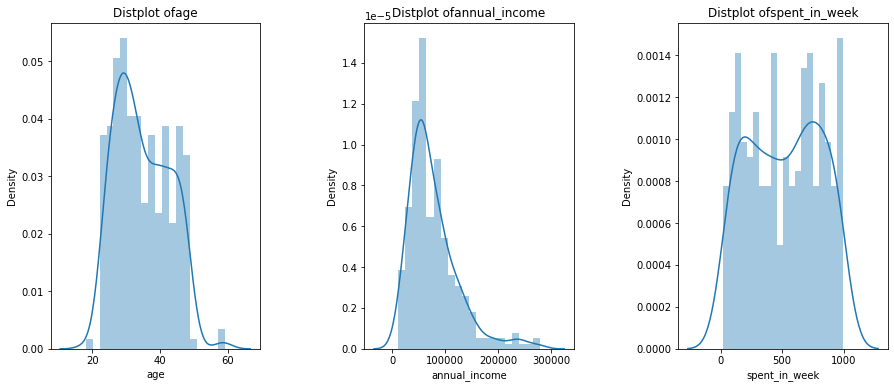

In [10]:
#Ploting the Distribution Plot for understand the distribution of the data.
plt.figure(1,figsize=(15,6))
n=0
for x in ['age', 'annual_income', 'spent_in_week']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of{}'.format(x))
plt.show()

# Gender Plot

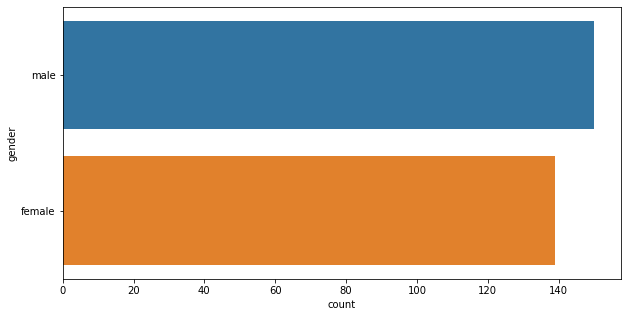

In [11]:
# Visualising the columns 'Gender' using Countplot
plt.figure(figsize=(10,5))
sns.countplot(y='gender',data=df)
plt.show()

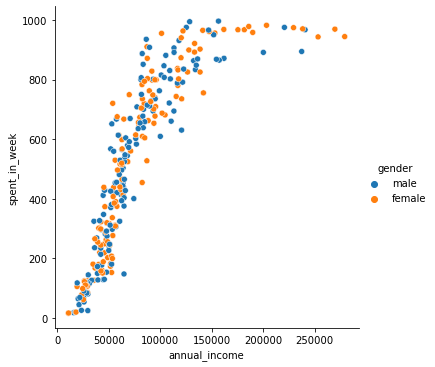

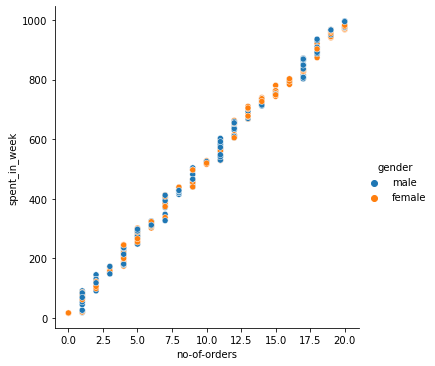

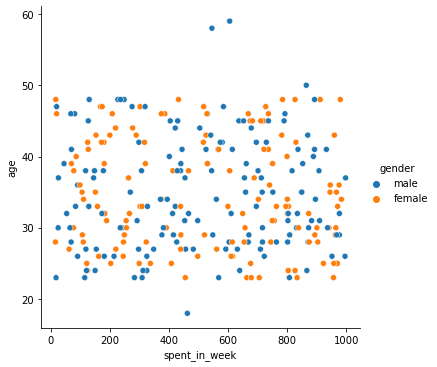

In [12]:
# Visualising the columns 'Annual income', 'Spent in week' using Scatterplot
sns.relplot(x="annual_income",y="spent_in_week",data=df, hue='gender')
# Visualising the columns 'no of orders', 'Spent in week' using Scatterplot
sns.relplot(x="no-of-orders",y="spent_in_week",data=df, hue='gender')
# Visualising the columns 'Spent in week', 'age' using Scatterplot
sns.relplot(x="spent_in_week",y="age",data=df, hue='gender')

# Age Plot

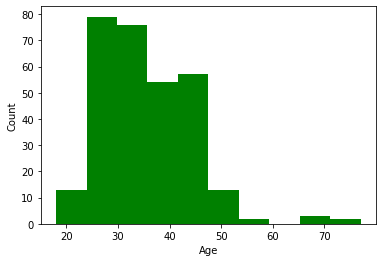

In [13]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=df_copy['age'], bins=10, orientation='vertical', color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

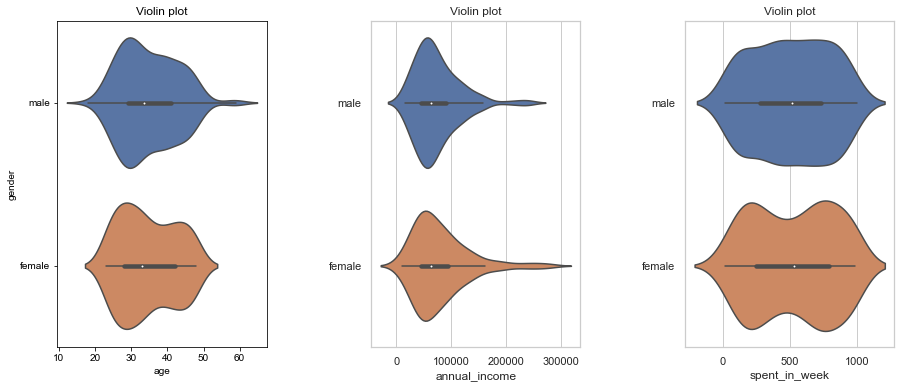

In [14]:
#Violin Plot for understanding the relations between 'age', 'annual_income' and 'spent_in_week'.
plt.figure(1,figsize=(15,6))
n=0
for cols in ['age', 'annual_income', 'spent_in_week']:
    n += 1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='gender',data=df)
    plt.ylabel('gender' if n==1 else '')
    plt.title('Violin plot')
plt.show()

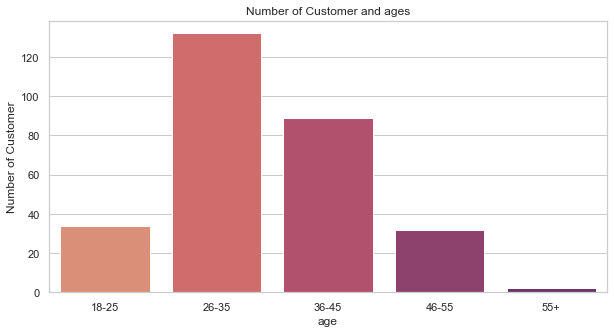

In [15]:
#Partitioning the age in to several group for understanding the maximum customer are of which age group.
age_18_25 = df.age[(df.age>=18)&(df.age<=25)]
age_26_35 = df.age[(df.age>=26)&(df.age<=35)]
age_36_45 = df.age[(df.age>=36)&(df.age<=45)]
age_46_55 = df.age[(df.age>=46)&(df.age<=55)]
age_56above = df.age[df.age>=56]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56above.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=agex, y=agey, palette="flare")
plt.title("Number of Customer and ages")
plt.xlabel("age")
plt.ylabel("Number of Customer")
plt.show()

## Job vs Income Plot

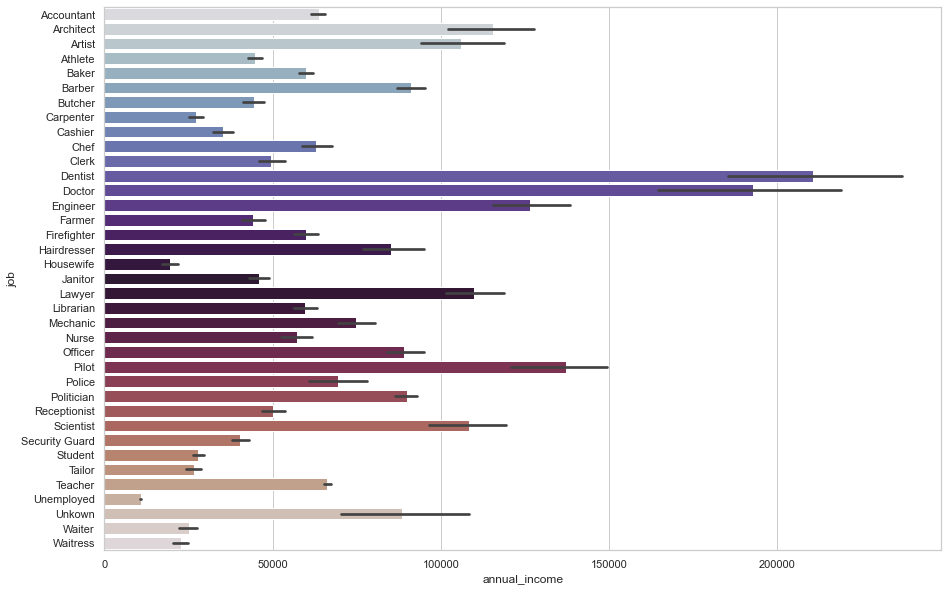

In [16]:
#Job Vs Annual Income for understanding which customers has more income
y=df['job']
x=df['annual_income']
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, palette="twilight")
plt.show()

# Data Preprocessing by using KMean Clustering Method

In [17]:
# Selecting 'Age','Annual Income' and 'Spent in week' as the features for clustering
x=df.iloc[:,[5,7,10]].values
x

array([[    29,    415,  61703],
       [    31,    453,  63788],
       [    18,    462,  63306],
       [    38,    544,  66894],
       [    58,    545,  67950],
       [    33,    599,  62696],
       [    59,    605,  66413],
       [    28,    668,  57393],
       [    38,    816, 100929],
       [    50,    864, 132448],
       [    48,    911,  87048],
       [    25,    922, 133375],
       [    41,    932, 118232],
       [    30,    941, 120382],
       [    27,    631, 120692],
       [    39,    661, 110587],
       [    43,    781, 117093],
       [    28,    801,  81144],
       [    32,    834, 134160],
       [    39,    852,  83349],
       [    32,    872,  87374],
       [    31,    882, 105388],
       [    29,    893, 133284],
       [    30,    936,  86377],
       [    32,    179,  42433],
       [    42,    180,  40140],
       [    44,    219,  45604],
       [    30,    241,  50229],
       [    29,    249,  45621],
       [    23,    283,  46451],
       [  

In [18]:
#importing sklearns and KMean Clustering method and determine the number of clusters by appling the Elbow Method
# Calculating WCSS values for maximum 10 clusters
# Plotting the WCSS values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


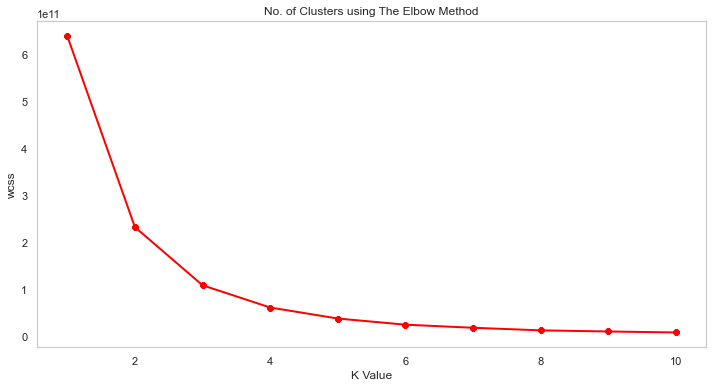

In [19]:
# Plotting the WCSS values using The Elbow Method
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.title("No. of Clusters using The Elbow Method")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [20]:
# from the above plot we can determine that 4 clusters are possible, now labeling the clusters in the dataset
kmeans_model=KMeans(n_clusters=4, init="k-means++", random_state=0)
y_kmeans=kmeans_model.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 3 0 2 0 2 2 2 2 2 2 0 2 0 0 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 0
 0 0 3 3 0 3 0 3 0 0 0 2 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 0 3 0 3 3 0 0 0 0 0 3 3 3 3 3 3 2 1 1 1 1 1 2 1 1 2 1 2 1
 1 2 1 1 1 2 2 2 2 2 2 2 2 0 2 2 2 3 3 3 3 3 3 3 0 0 3 0 0 0 0 0 0 0 0 2 3
 3 3 3 3 3 3 3 3 3 3 0 2 2 2 0 0 2 2 2 2 0 3 0 3 0 0 0 0 0 0 0 3 0 0 0 0 3
 3 3 0 0 0 0 0 0 0 0 0 2 2 2 0 2 2 2 3 0 3 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 3
 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 0 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 3 3 3 0 0 0 0 2 2 3 3 3 3 3 3 3 3 3 3 3]


In [21]:
#return the centroids of the clusters
print(kmeans_model.cluster_centers_)

[[3.58461538e+01 6.28096154e+02 7.73030192e+04]
 [3.47692308e+01 9.55769231e+02 2.25432692e+05]
 [3.28367347e+01 8.56775510e+02 1.28656000e+05]
 [3.45772358e+01 2.37804878e+02 4.08503252e+04]]


In [22]:
#Feature Scaling for x1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

<ipython-input-23-445198fe1aab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["KMean_clusters"]=clusters


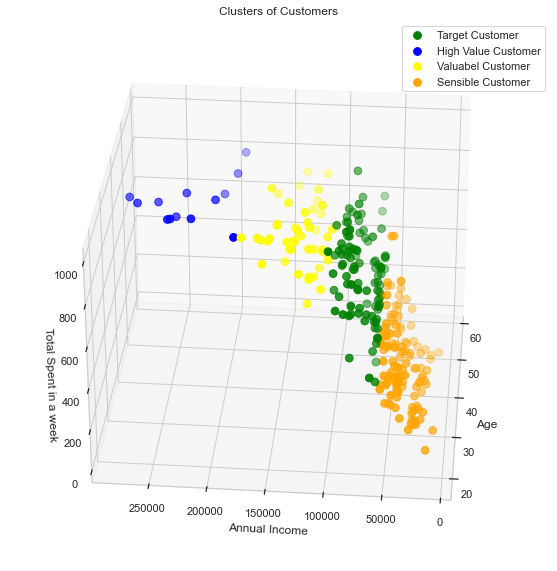

In [23]:
#ploting the diffrent clusters in 3D space using mpl_toolkits   
clusters=kmeans_model.fit_predict(x)
df["KMean_clusters"]=clusters
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df.age[df.KMean_clusters==0],df["annual_income"][df.KMean_clusters==0],df["spent_in_week"][df.KMean_clusters==0],s=60,c='green',label='Target Customer')
ax.scatter(df.age[df.KMean_clusters==1],df["annual_income"][df.KMean_clusters==1],df["spent_in_week"][df.KMean_clusters==1],s=60,c='blue',label='High Value Customer')
ax.scatter(df.age[df.KMean_clusters==2],df["annual_income"][df.KMean_clusters==2],df["spent_in_week"][df.KMean_clusters==2],s=60,c='yellow',label='Valuabel Customer')
ax.scatter(df.age[df.KMean_clusters==3],df["annual_income"][df.KMean_clusters==3],df["spent_in_week"][df.KMean_clusters==3],s=60,c='orange',label='Sensible Customer')
#ax.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=100, c='black',label='Centroids')
ax.view_init(30,185)
plt.legend()
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Total Spent in a week')

plt.show()

In [24]:
'''Return the data table with a new column which determine the cluster
in which the customer is lies.and save the new csv file'''   
df.head(10)


,Name,email,phone_no,address,gender,age,no-of-orders,spent_in_week,job,website,annual_income,KMean_clusters
0,Joseph Rice,josephrice131@slingacademy.com,8568697744,"91773 Miller Shoal\nDiaztown, FL 38841",male,29,8,415,Accountant,goPuff,61703,0
1,Gary Moore,garymoore386@slingacademy.com,8894334342,"6450 John Lodge\nTerriton, KY 95945",male,31,9,453,Accountant,UberEats,63788,0
2,John Walker,johnwalker944@slingacademy.com,9546779749,"27265 Murray Island\nKevinfort, PA 63231",male,18,9,462,Accountant,Grubhub,63306,0
3,Eric Carter,ericcarter176@slingacademy.com,8646218619,USNS Knight\nFPO AA 76532,male,38,11,544,Accountant,Grubhub,66894,0
4,William Jackson,williamjackson427@slingacademy.com,6894694791,"170 Jackson Loaf\nKristenland, AS 48876",male,58,11,545,Accountant,Grubhub,67950,0
5,Nicole Jones,nicolejones228@slingacademy.com,8602272975,"14354 Baker Harbor Apt. 017\nEricville, HI 11192",female,33,11,599,Accountant,goPuff,62696,0
6,David Davis,daviddavis980@slingacademy.com,8857137771,"021 Katherine Mall\nJameston, DC 24685",male,59,12,605,Accountant,goPuff,66413,0
7,Jason Montgomery,jasonmontgomery889@slingacademy.com,7114359069,"14657 Scott Loop Apt. 735\nPort Ashley, NH 34470",male,28,13,668,Accountant,goPuff,57393,3
8,Kent Weaver,kentweaver695@slingacademy.com,6435074872,"6644 Mitchell Burg\nVictorhaven, KS 66356",male,38,17,816,Architect,goPuff,100929,0
9,Darrell Dillon,darrelldillon573@slingacademy.com,9930528232,"PSC 7267, Box 9911\nAPO AE 49343",male,50,17,864,Architect,Grubhub,132448,2


In [25]:
df.to_csv('new.csv', index = False)

In [26]:
Cluster=['High Value Customer','Valuabel Customer','Sensible Customer''Target Customers', ]
cluster=kmeans_model.predict([[20,    569,  192058]])
print(cluster)
Cluster[cluster[0]]

[1]


'Valuabel Customer'

In [27]:
#creating a pickle file
import pickle

# Provide the filename for the .pkl file
# Save the model to the .pkl file
pickle_out =open("kmeans_model.pkl","wb")
pickle.dump(kmeans_model, pickle_out)
pickle_out.close()



    

In [28]:
pickle_show= open('kmeans_model.pkl', 'rb')
pickle.load(pickle_show)

KMeans(n_clusters=4, random_state=0)

In [29]:

kmeans_model.predict([[     31,    453,  63788]])

array([0])